# Anscombe's Quartet Dataset

The following assignment concerns the well-known Anscombe’s quartet dataset [2]. You
are required to create a Jupyter [5] notebook analysing the dataset. There are four
distinct tasks to be carried out in your Jupyter notebook.
1. Explain the background to the dataset – who created it, when it was created, and
any speculation you can find regarding how it might have been created.
2. Plot the interesting aspects of the dataset.
3. Calculate the descriptive statistics of the variables in the dataset.
4. Explain why the dataset is interesting, referring to the plots and statistics above.

# 1. Background to the Dataset

who 
when 

speculation regarding how it was created

Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

Anscombes quartet is a set of 4 x,y data sets that were published by Francis Anscombe in a 1973 paper Graphs in statistical analysis. 

![image on the internet](https://blueollie.files.wordpress.com/2014/03/projectionmap.jpg?w=600)



Visualization may not be as precise as statistics, but it provides a unique view onto data that can make it much easier to discover interesting structures than numerical methods. Visualization also provides the context necessary to make better choices and to be more careful when fitting models. Anscombe’s Quartet is a case in point, showing that four datasets that have identical statistical properties can indeed be very different.

Arguing for Graphics in 1973

In 1973, Francis J. Anscombe published a paper titled, Graphs in Statistical Analysis. The idea of using graphical methods had been established relatively recently by John Tukey, but there was evidently still a lot of skepticism. Anscombe first lists some notions that textbooks were “indoctrinating” people with, like the idea that “numerical calculations are exact, but graphs are rough.”

He then presents a table of numbers. It contains four distinct datasets (hence the name Anscombe’s Quartet), each with statistical properties that are essentially identical: the mean of the x values is 9.0, mean of y values is 7.5, they all have nearly identical variances, correlations, and regression lines (to at least two decimal places).



# 2. Interesting Aspects of the Dataset

In [72]:
# Import numpy as np
import numpy as np

# Import pandas
import pandas as pd

# import seaborn 
import seaborn as sns
from scipy.optimize import curve_fit

# import matplot
import matplotlib.pyplot as plt

In [22]:
# Load the iris data set from a URL.
df = pd.read_csv("https://gist.github.com/ericbusboom/b2ac1d366c005cd2ed8c/raw/c92c66e43d144fa9c29dbd602d5af6988e8db533/anscombes.csv")

In [23]:
df

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33
5,5,I,14.0,9.96
6,6,I,6.0,7.24
7,7,I,4.0,4.26
8,8,I,12.0,10.84
9,9,I,7.0,4.82


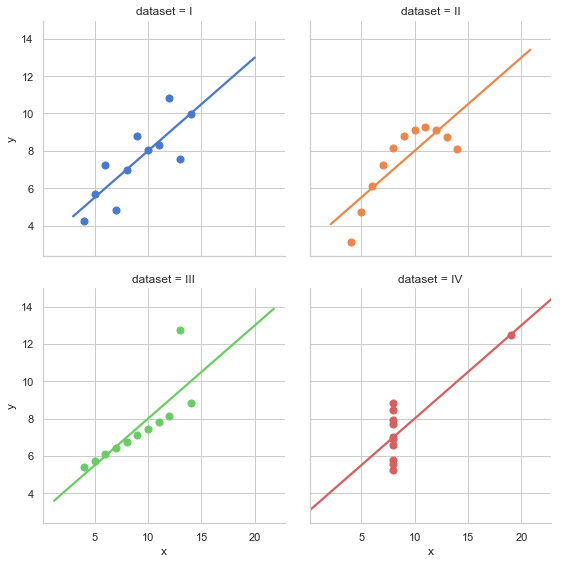

In [36]:
# The data set can also be loaded directly Load the example dataset for Anscombe's quartet for seaborn
df = sns.load_dataset("anscombe")

sns.set(style="whitegrid")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


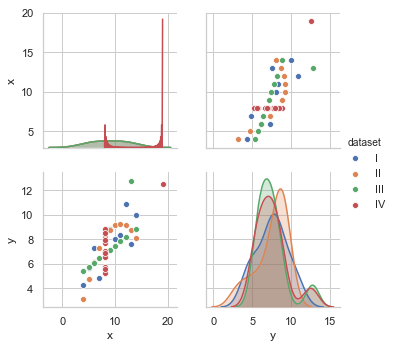

In [39]:
sns.pairplot(df, hue='dataset')

<Figure size 432x288 with 0 Axes>

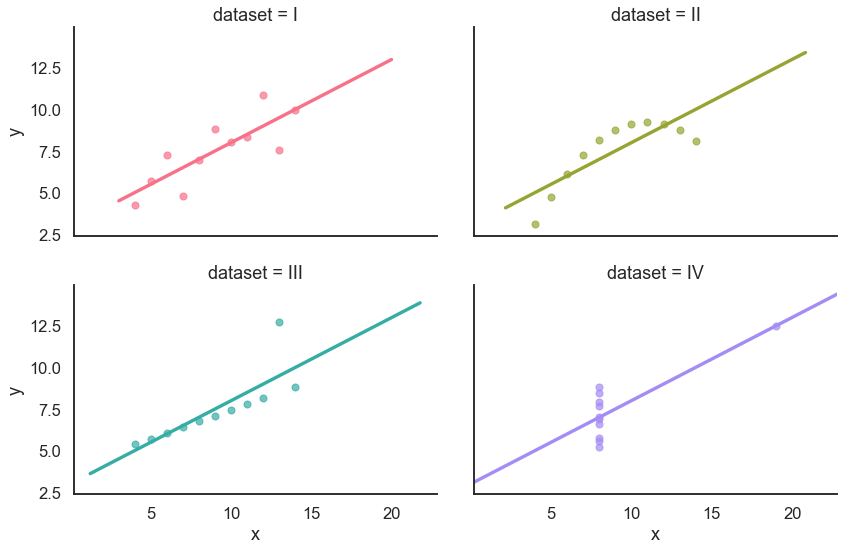

In [34]:


# Function for linear fit
def func(x, a, b):
    return a + b * x

# Seaborn conveniently provides the data for
# Anscombe's quartet.
df = sns.load_dataset("anscombe")
dset = df.dataset.unique()

# Computing basic stats and linear regression
# all groups.
for data in dset:
    tmp = df.loc[df.dataset == data]


# Setting up params for graphic
sns.set(style="white")
sns.set_context("talk")
sns.despine(left=True)

# Plotting
catcher = sns.lmplot("x", "y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="husl", height=4,
           scatter_kws={"s": 50, "alpha": 0.7}, aspect=1.5)

sns.despine()

# Saving graphic
plt.savefig('quartet.png')

The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.
The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.
In the third graph (bottom left), the distribution is linear, but should have a different regression line (a robust regression would have been called for). The calculated regression is offset by the one outlier which exerts enough influence to lower the correlation coefficient from 1 to 0.816.
Finally, the fourth graph (bottom right) shows an example when one outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

# 3. Descriptive Statistics of the Variables in the Dataset

In [64]:
df.mean()

x    9.000000
y    7.500682
dtype: float64

In [66]:
df.describe()


,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [71]:
df.mean(0,23)

x    9.000000
y    7.500682
dtype: float64

All these datasets have the same mean, variance, correlation coefficient and regression line:




# 4. Why the Dataset is Interesting

 four small tables that have the same, or very similar, statistical metrics including mean, variance, and correlation. However, visually inspecting these tables tells a very different story:
 
 While dataset I appears like many well-behaved datasets that have clean and well-fitting linear models, the others are not served nearly as well. Dataset II does not have a linear correlation; dataset III does, but the linear regression is thrown off by an outlier. It would be easy to fit a correct linear model, if only the outlier were spotted and removed before doing so. Dataset IV, finally, does not fit any kind of linear model, but the single outlier makes keeps the alarm from going off.

How do you find out which model can be applied? Anscombe’s answer is to use graphs: looking at the data immediately reveals a lot of the structure, and makes the analyst aware of “pathological” cases like dataset IV. Computers are not limited to running numerical models, either.

A computer should make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.

What is an Outlier?

In addition to showing how useful a clear look onto data can be, Anscombe also raises an interesting question: what, exactly, is an outlier? He describes a study on education, where he studied per-capita expenditures for public schools in the 50 U.S. states and the District of Columbia. Alaska is a bit of an outlier, so it moves the regression line away from the mainstream. The obvious response would be to remove Alaska from the data before computing the regression. But then, another state will be an outlier. Where do you stop?

Anscombe argues that the correct answer is to show both the regression with Alaska, but also how much it contributes and what happens when it is removed.

The tool here, again, are graphical representations. Not only the actual data needs to be shown, but also the distances from the regression line (the residuals), and other statistics that help judge how well the model fits. It seems like an obvious thing to do, but presumably was not the norm in the 1970s, and I can imagine that it still not always is.

It can be seen both graphically and from regression summary that each data set resulted in same statistical model!

Intercepts, coeficients and their p values are the same. SEE (standard error of the estimate, or SD of residuals), F-value and it’s p values are the same.

Conclusion: ALWAYS plot your data! And always do model diagnostics by plotting the residuals.
![trex joke](https://2.bp.blogspot.com/-oCs3ZH8h1HE/Wkqh9H_39oI/AAAAAAAAd88/TfalMCzPn-Q7rW_ZNsLfWaEsPC-X_QXJgCLcBGAs/s1600/trex.JPG)


It was constructed in from Graphs in Statistical Analysis, The American Statistician, 1973. Since then, there have been attemps to reproduce or generalize it on a broader extend, for instance:

Generating Data with Identical Statistics but Dissimilar Graphics: A Follow up to the Anscombe Dataset, The American Statistician, 2007,
.Cloning data: generating datasets with exactly the same multiple linear regression fit, Australian and New Zealand Journal of Statistics, 2009.

Using and Abusing Data Visualization: Anscombe’s Quartet and Cheating Bonferroni
February 26, 2015
By Stephen Turner

inShare
(This article was first published on Getting Genetics Done, and kindly contributed to R-bloggers)
Share
Tweet
Anscombe’s quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.
Let’s load and view the data. There’s a built-in dataset, but I munged the data into a tidy format and included it in an R package that I wrote primarily for myself.

SET	X	Y
I	10	8.04
I	8	6.95
I	13	7.58
…	…	…
II	10	9.14
II	8	8.14
II	13	8.74
…	…	…
III	10	7.46
III	8	6.77
III	13	12.74
…	…	…
IV	8	6.58
IV	8	5.76
IV	8	7.71
…	…	…
Now, let’s compute the mean and standard deviation of both x and y, and the correlation coefficient between x and y for each dataset.
library(dplyr)
quartet %>%
  group_by(set) %>%
  summarize(mean(x), sd(x), mean(y), sd(y), cor(x,y))
## Source: local data frame [4 x 6]
##
##   set mean(x) sd(x) mean(y) sd(y) cor(x, y)
## 1   I       9  3.32     7.5  2.03     0.816
## 2  II       9  3.32     7.5  2.03     0.816
## 3 III       9  3.32     7.5  2.03     0.816
## 4  IV       9  3.32     7.5  2.03     0.817
Looks like each dataset has the same mean, median, standard deviation, and correlation coefficient between x and y.
Now, let’s plot y versus x for each set with a linear regression trendline displayed on each plot:
library(ggplot2)
p = ggplot(quartet, aes(x, y)) + geom_point()
p = p + geom_smooth(method = lm, se = FALSE)
p = p + facet_wrap(~set)
p

This classic example really illustrates the importance of looking at your data, not just the summary statistics and model parameters you compute from it.
With that said, you can’t use data visualization to “cheat” your way into statistical significance. I recently had a collaborator who wanted some help automating a data visualization task so that she could decide which correlations to test. This is a terrible idea, and it’s going to get you in serious type I error trouble. To see what I mean, consider an experiment where you have a single outcome and lots of potential predictors to test individually. For example, some outcome and a bunch of SNPs or gene expression measurements. You can’t just visually inspect all those relationships then cherry-pick the ones you want to evaluate with a statistical hypothesis test, thinking that you’ve outsmarted your way around a painful multiple-testing correction.
Here’s a simple simulation showing why that doesn’t fly. In this example, I’m simulating 100 samples with a single outcome variable y and 64 different predictor variables, x. I might be interested in which x variable is associated with my y (e.g., which of my many gene expression measurement is associated with measured liver toxicity). But in this case, both x and y are random numbers. That is, I know for a fact the null hypothesis is true, because that’s what I’ve simulated. Now we can make a scatterplot for each predictor variable against our outcome, and look at that plot.
library(dplyr)
set.seed(42)
ndset = 64
n = 100
d = data_frame(
  set = factor(rep(1:ndset, each = n)),
  x = rnorm(n * ndset),
  y = rep(rnorm(n), ndset))
d
## Source: local data frame [6,400 x 3]
##
##    set       x       y
## 1    1  1.3710  1.2546
## 2    1 -0.5647  0.0936
## 3    1  0.3631 -0.0678
## 4    1  0.6329  0.2846
## 5    1  0.4043  1.0350
## 6    1 -0.1061 -2.1364
## 7    1  1.5115 -1.5967
## 8    1 -0.0947  0.7663
## 9    1  2.0184  1.8043
## 10   1 -0.0627 -0.1122
## .. ...     ...     ...
ggplot(d, aes(x, y)) + geom_point() + geom_smooth(method = lm) + facet_wrap(~set)

Now, if I were to go through this data and compute the p-value for the linear regression of each x on y, I’d get a uniform distribution of p-values, my type I error is where it should be, and my FDR and Bonferroni-corrected p-values would almost all be 1. This is what we expect — remember, the null hypothesis is true.
library(dplyr)
results = d %>%
  group_by(set) %>%
  do(mod = lm(y ~ x, data = .)) %>%
  summarize(set = set, p = anova(mod)$"Pr(>F)"[1]) %>%
  mutate(bon = p.adjust(p, method = "bonferroni")) %>%
  mutate(fdr = p.adjust(p, method = "bonferroni"))
results
## Source: local data frame [64 x 4]
##
##    set      p   bon   fdr
## 1    1 0.2738 1.000 1.000
## 2    2 0.2125 1.000 1.000
## 3    3 0.7650 1.000 1.000
## 4    4 0.2094 1.000 1.000
## 5    5 0.8073 1.000 1.000
## 6    6 0.0132 0.844 0.844
## 7    7 0.4277 1.000 1.000
## 8    8 0.7323 1.000 1.000
## 9    9 0.9323 1.000 1.000
## 10  10 0.1600 1.000 1.000
## .. ...    ...   ...   ...
library(qqman)
qq(results$p)

BUT, if I were to look at those plots above and cherry-pick out which hypotheses to test based on how strong the correlation looks, my type I error will skyrocket. Looking at the plot above, it looks like the x variables 6, 28, 41, and 49 have a particularly strong correlation with my outcome, y. What happens if I try to do the statistical test on only those variables?
results %>% filter(set %in% c(6, 28, 41, 49))
## Source: local data frame [4 x 4]
##
##   set      p   bon   fdr
## 1   6 0.0132 0.844 0.844
## 2  28 0.0338 1.000 1.000
## 3  41 0.0624 1.000 1.000
## 4  49 0.0898 1.000 1.000
When I do that, my p-values for those four tests are all below 0.1, with two below 0.05 (and I’ll say it again, the null hypothesis is true in this experiment, because I’ve simulated random data). In other words, my type I error is now completely out of control, with more than 50% false positives at a p<0 .05="" 64="" all="" and="" are="" bonferroni="" correcting="" fdr-corrected="" for="" level.="" ll="" not="" notice="" p-values="" p="" significant.="" still="" tests="" that="" the="" you="">
The moral of the story here is to always look at your data, but don’t “cheat” by basing which statistical tests you perform based solely on that visualization exercise.
Getting Genetics Done by Stephen Turner is licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License.

# Projections, regressions and Anscombe’s quartet…
Filed under: calculus, data fitting, media, pedagogy, statistics — Tags: Anscombe's quartet, linear regression, Nate Silver, Paul Krugman, projection maps — collegemathteaching @ 1:46 am
Data and its role in journalism is a hot topic among some of the bloggers that I regularly follow. See: Nate Silver on what he hopes to accomplish with his new website, and Paul Krugman’s caveats on this project. The debate is, as I see it, about the role of data and the role of having expertise in a subject when it comes to providing the public with an accurate picture of what is going on.

Then I saw this meme on a Facebook page:



These two things (the discussion and meme) lead me to make this post.

First the meme: I thought of this meme as a way to explain volume integration by “cross sections”. 🙂 But for this post, I’ll focus on this meme showing an example of a “projection map” in mathematics. I can even provide some equations: imagine the following set in R^3  described as follows: S= \{(x,y,z) | (y-2)^2 + (z-2)^2 \le 1, 1 \le x \le 2 \}  Now the projection map to the y-z  plane is given by p_{yz}(x,y,z) = (0,y,z)  and the image set is S_{yz} = \{(0,y,z)| (y-2)^2 + (z-2)^2 \le 1  which is a disk (in the yellow).

The projection onto the x-z  plane is given by p_{xz}(x,y,z) = (x,0,z)  and the image is S_{xz} = \{(x,0,z)| 1 \le x \le 2, 1 \le z \le 3 \}  which is a rectangle (in the blue).

The issue raised by this meme is that neither projection, in and of itself, determines the set S . In fact, both of these projections, taken together, do not determine the object. For example: the “hollow can” in the shape of our S  would have the same projection; there are literally an uncountable. Example: imagine a rectangle in the shape of the blue projection joined to one end disk parallel to the yellow plane.

Of course, one can put some restrictions on candidates for S  (the pre image of both projections taken together); say one might want S to be a manifold of either 2 or 3 dimensions, or some other criteria. But THAT would be adding more information to the mix and thereby, in a sense, providing yet another projection map.

Projections, by design, lose information.

In statistics, a statistic, by definition, is a type of projection. Consider, for example, linear regression. I discussed linear regressions and using “fake data” to teach linear regression here. But the linear regression process inputs data points and produces numbers including the mean and standard deviations of the x, y  values as well as the correlation coefficient and the regression coefficients.

But one loses information in the process. A good demonstration of this comes from Anscombe’s quartet: one has 4 very different data set producing identical regression coefficients (and yes, correlation coefficients, confidence intervals, etc). Here are the plots of the data:



And here is the data:

Screen shot 2014-03-20 at 8.40.03 PM

The Wikipedia article I quoted is pretty good; they even provide a link to a paper that gives an algorithm to generate different data sets with the same regression values (and yes, the paper defines what is meant by “different”).

Moral: when one crunches data, one has to be aware of the loss of information that is involved.


Questions
For this first question load the anscombe data that is part of the library(datasets) in R. And assign that data to a new object called data.
library(datasets)
data = anscombe
(eg. x1 and y1, x2 and y2, etc) (Hint: use the fBasics() package!)
#install.packages("fBasics")
library(ggplot2)
library(dplyr)


In text, summarize the lesson of Anscombe’s Quartet and what it says about the value of data visualization.
The four pairs of x and y values as well as the models appear to be identical: mean of x is 9, variance of x is 11, mean of y is 7.5 and variance of y is 4.12. The correlation between x and y in all four pairs is 0.816 and the linaer regression equations are all y = 3 + 0.5x.

However, if we examine the four plots of x and y, data visualization shows that the four datasets are very different. Dataset 1 shows to a small extent a linear relationship, dataset 2 shows no linear relationship, dataset 3 shows very strong linear relationship with an outlier, and dataset 4 shows constant x values with varying y values, except for one observation.

Anscombe’s Quartet shows exactly how important data visualization is in data analyses and how helpful it is in helping us make initial judgements on relationships between variables before conducting statistic calculations. Without data visualization, statistics alone could be misleading and land us at a wrong conclusion.

# References 

https://www.r-bloggers.com/using-and-abusing-data-visualization-anscombes-quartet-and-cheating-bonferroni/
***
https://en.wikipedia.org/wiki/Anscombe%27s_quartet
***
https://collegemathteaching.wordpress.com/2014/03/21/projections-regressions-and-anscombes-quartet/
***
https://www.tcd.ie/medicine/psychiatry/assets/doc/Introduction_to_Data_Analysis_Slides.pdf
***
https://kx.com/blog/kx-product-insights-visualization-for-exploratory-data-analysis-eda/
***
https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html
***

# End